[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/MultiNEAs/blob/main/examples/orbit_coordinates_tutorial.ipynb)

# MultiNEAs: The `orbit` Module Tutorial

This notebook demonstrates how to use the `multineas.orbit` module for transforming between Cartesian coordinates (position and velocity) and orbital elements. These transformations are essential for working with orbital mechanics and probability density functions in orbital element space.

## Installation

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multineas
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiNEAs.git

Not running in Colab, skipping installation


## Load the Package

Import `multineas.orbit` and other required libraries:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore")

from multineas.orbit import OrbitalCoordinates
from multineas.util import Util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

The `OrbitalCoordinates` class provides methods to transform between:

1. **Cartesian coordinates** (position x, y, z and velocity vx, vy, vz)
2. **Orbital elements** (periapsis distance q, eccentricity e, inclination i, longitude of ascending node Ω, argument of periapsis ω, mean anomaly M, and semi-major axis a)

It also computes the Jacobian matrix for these transformations, which is essential for converting probability density functions between coordinate systems.

## Create an Instance

First, let's create an instance of the `OrbitalCoordinates` class:

In [15]:
oc = OrbitalCoordinates()

## Define Gravitational Parameter

For orbital calculations, we need the standard gravitational parameter μ. In canonical units (AU, days, solar masses), this is:

In [16]:
# Standard gravitational parameter in canonical units (AU^3/day^2)
# This is approximately k^2 where k = 0.01720209895 AU^(3/2) / day
mu = 39
print(f"Gravitational parameter μ = {mu:.10f} AU³/day²")

Gravitational parameter μ = 39.0000000000 AU³/day²


## Transformation from Cartesian to Orbital Elements

The `transformation_x_to_e()` method converts a state vector (position and velocity) to orbital elements.

### Example 1: Circular Orbit

Let's start with a simple circular orbit at 1 AU:

In [17]:
# Circular orbit at 1 AU
# Position: 1 AU along x-axis
x, y, z = 1.0, 0.0, 0.0

# Velocity: Circular velocity ~6.28 AU/day at 1 AU
vx, vy, vz = 0.0, 6.28, 0.0

# Transform to orbital elements
q, e, i, Omega, w, M, a = oc.transformation_x_to_e(x, y, z, vx, vy, vz, mu)

print("Orbital Elements:")
print(f"  Periapsis distance (q): {q:.6f} AU")
print(f"  Eccentricity (e): {e:.6f}")
print(f"  Inclination (i): {np.degrees(i):.4f}°")
print(f"  Longitude of ascending node (Ω): {np.degrees(Omega):.4f}°")
print(f"  Argument of periapsis (ω): {np.degrees(w):.4f}°")
print(f"  Mean anomaly (M): {np.degrees(M):.4f}°")
print(f"  Semi-major axis (a): {a:.6f} AU")

Orbital Elements:
  Periapsis distance (q): 1.000000 AU
  Eccentricity (e): 0.011241
  Inclination (i): 0.0000°
  Longitude of ascending node (Ω): 0.0000°
  Argument of periapsis (ω): 0.0000°
  Mean anomaly (M): 0.0000°
  Semi-major axis (a): 1.011369 AU


### Example 2: Elliptical Orbit

Now let's try an elliptical orbit:

In [18]:
# Elliptical orbit: starting at periapsis
x, y, z = 0.5, 0.0, 0.0  # Periapsis at 0.5 AU
vx, vy, vz = 0.0, 8.0, 0.0  # Higher velocity at periapsis

q, e, i, Omega, w, M, a = oc.transformation_x_to_e(x, y, z, vx, vy, vz, mu)

print("Orbital Elements:")
print(f"  Periapsis distance (q): {q:.6f} AU")
print(f"  Eccentricity (e): {e:.6f}")
print(f"  Semi-major axis (a): {a:.6f} AU")
print(f"  Apoapsis distance (Q): {a*(1+e):.6f} AU")

Orbital Elements:
  Periapsis distance (q): 0.347826 AU
  Eccentricity (e): 0.179487
  Semi-major axis (a): 0.423913 AU
  Apoapsis distance (Q): 0.500000 AU


## Transformation from Orbital Elements to Cartesian

The `transformation_e_to_x()` method performs the inverse transformation, converting orbital elements back to Cartesian coordinates.

### Example: Round-trip Transformation

Let's verify that the transformations are inverse operations:

In [19]:
# Start with Cartesian coordinates
x_orig, y_orig, z_orig = 1.0, 0.0, 0.0
vx_orig, vy_orig, vz_orig = 0.0, 6.28, 0.0

print("Original Cartesian coordinates:")
print(f"  Position: ({x_orig:.6f}, {y_orig:.6f}, {z_orig:.6f}) AU")
print(f"  Velocity: ({vx_orig:.6f}, {vy_orig:.6f}, {vz_orig:.6f}) AU/day")
print()

# Transform to orbital elements
q, e, i, Omega, w, M, a = oc.transformation_x_to_e(
    x_orig, y_orig, z_orig, vx_orig, vy_orig, vz_orig, mu
)

print("Orbital elements:")
print(f"  q={q:.6f} AU, e={e:.6f}, a={a:.6f} AU")
print()

# Transform back to Cartesian
x_new, y_new, z_new, vx_new, vy_new, vz_new = oc.transformation_e_to_x(
    q, e, i, Omega, w, M, mu
)

print("Recovered Cartesian coordinates:")
print(f"  Position: ({x_new:.6f}, {y_new:.6f}, {z_new:.6f}) AU")
print(f"  Velocity: ({vx_new:.6f}, {vy_new:.6f}, {vz_new:.6f}) AU/day")
print()

# Check the difference
pos_diff = np.sqrt((x_new - x_orig)**2 + (y_new - y_orig)**2 + (z_new - z_orig)**2)
vel_diff = np.sqrt((vx_new - vx_orig)**2 + (vy_new - vy_orig)**2 + (vz_new - vz_orig)**2)

print(f"Position difference: {pos_diff:.2e} AU")
print(f"Velocity difference: {vel_diff:.2e} AU/day")

Original Cartesian coordinates:
  Position: (1.000000, 0.000000, 0.000000) AU
  Velocity: (0.000000, 6.280000, 0.000000) AU/day

Orbital elements:
  q=1.000000 AU, e=0.011241, a=1.011369 AU

Recovered Cartesian coordinates:
  Position: (1.000000, 0.000000, 0.000000) AU
  Velocity: (-0.000000, 6.280000, 0.000000) AU/day

Position difference: 0.00e+00 AU
Velocity difference: 8.88e-16 AU/day


## Computing the Jacobian Matrix

The `compute_jacobian_x_to_e()` method computes the Jacobian matrix that relates differential changes in Cartesian coordinates to differential changes in orbital elements. This is crucial for transforming probability density functions between coordinate systems.

### Example: Jacobian for a Circular Orbit

In [20]:
# Define orbital elements for a circular orbit
a = 1.0  # AU
e = 0.1  # Small eccentricity
i = np.pi / 6  # 30 degrees
Omega = 0.0
w = 0.0
M = 0.0  # Mean anomaly

# Compute the Jacobian
J = oc.compute_jacobian_x_to_e(a, e, i, Omega, w, M, mu)

print(f"Jacobian matrix shape: {J.shape}")
print(f"\nJacobian matrix:")
print(J)
print(f"\nJacobian determinant: {np.linalg.det(J):.6e}")

Jacobian matrix shape: (6, 6)

Jacobian matrix:
[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.9         0.77942286  0.95742711]
 [ 0.          0.          0.          0.          0.45        0.5527708 ]
 [ 0.          0.          0.         -5.97913037 -6.90410506 -7.70987407]
 [-3.3217391   2.71778653 -3.45205253  0.          0.          0.        ]
 [-1.91780696  1.56911479  5.97913037  0.          0.          0.        ]]

Jacobian determinant: 6.765414e+00


### Visualizing the Jacobian Matrix

Let's visualize the Jacobian matrix to understand its structure:

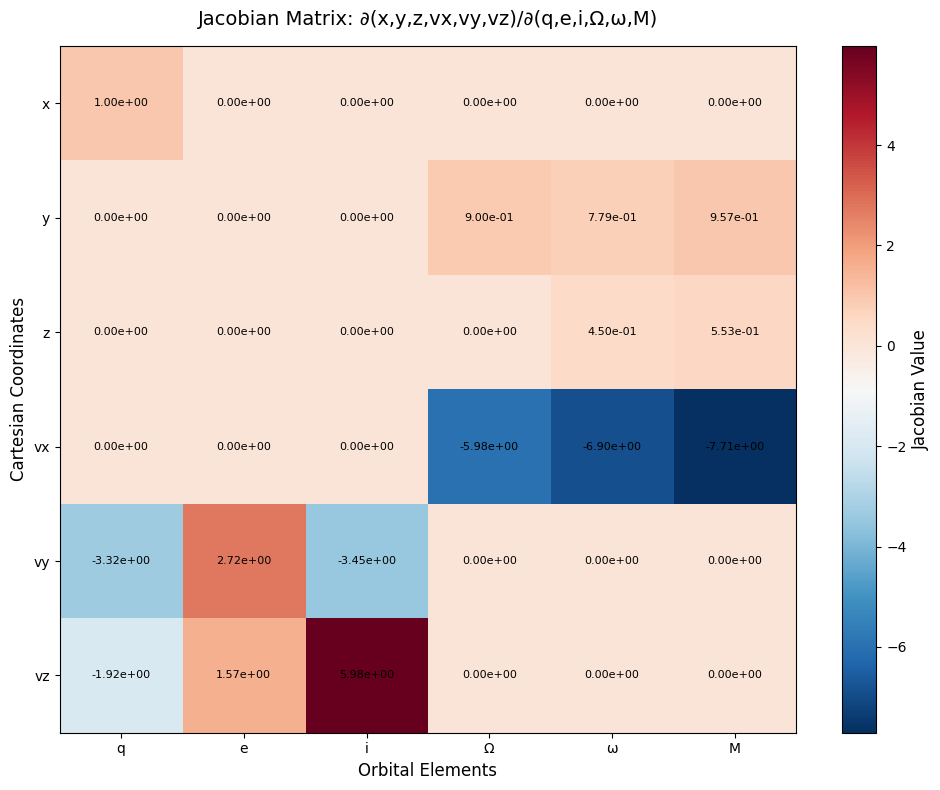

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(J, cmap='RdBu_r', aspect='auto')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Jacobian Value', fontsize=12)

# Set labels
cartesian_labels = ['x', 'y', 'z', 'vx', 'vy', 'vz']
element_labels = ['q', 'e', 'i', 'Ω', 'ω', 'M']

ax.set_xticks(np.arange(len(element_labels)))
ax.set_yticks(np.arange(len(cartesian_labels)))
ax.set_xticklabels(element_labels)
ax.set_yticklabels(cartesian_labels)

ax.set_xlabel('Orbital Elements', fontsize=12)
ax.set_ylabel('Cartesian Coordinates', fontsize=12)
ax.set_title('Jacobian Matrix: ∂(x,y,z,vx,vy,vz)/∂(q,e,i,Ω,ω,M)', fontsize=14, pad=15)

# Add text annotations
for i in range(len(cartesian_labels)):
    for j in range(len(element_labels)):
        text = ax.text(j, i, f'{J[i, j]:.2e}',
                      ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

### Jacobian Determinant for Probability Density Transformation

The determinant of the Jacobian is used to transform probability densities between coordinate systems:

$$P_E(\\mathbf{e}) = P_X(\\mathbf{x}) \\left| \\det J \\right|$$

where $P_E$ is the probability density in orbital element space and $P_X$ is the probability density in Cartesian space.

Let's compute the Jacobian determinant for different orbital configurations:

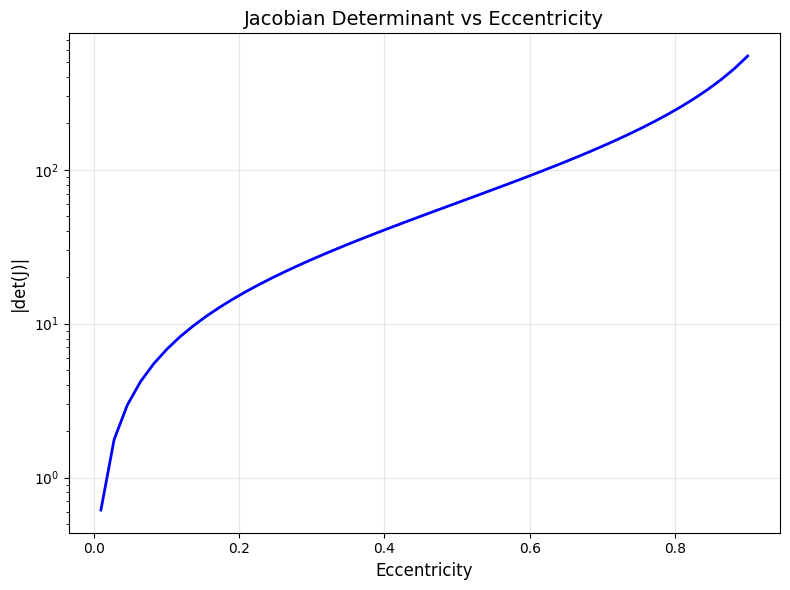

In [22]:
# Study how the Jacobian determinant varies with eccentricity
eccentricities = np.linspace(0.01, 0.9, 50)
determinants = []

a = 1.0  # AU
i = np.pi / 6  # 30 degrees
Omega = 0.0
w = 0.0
M = 0.0

for e in eccentricities:
    try:
        J = oc.compute_jacobian_x_to_e(a, e, i, Omega, w, M, mu)
        det = np.abs(np.linalg.det(J))
        determinants.append(det)
    except:
        determinants.append(np.nan)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eccentricities, determinants, 'b-', linewidth=2)
ax.set_xlabel('Eccentricity', fontsize=12)
ax.set_ylabel('|det(J)|', fontsize=12)
ax.set_title('Jacobian Determinant vs Eccentricity', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')
plt.tight_layout()
plt.show()

## Practical Example: Transforming Multiple Orbits

Let's transform a set of orbits from Cartesian to orbital element space:

In [23]:
# Create a set of orbits with different semi-major axes
semi_major_axes = np.linspace(0.5, 2.0, 10)

results = []

for a in semi_major_axes:
    # Start at periapsis (mean anomaly = 0)
    e = 0.2  # Fixed eccentricity
    q = a * (1 - e)  # Periapsis distance
    
    # Convert to Cartesian (at periapsis)
    i = np.pi / 6  # 30 degrees
    Omega = 0.0
    w = 0.0
    M = 0.0
    
    x, y, z, vx, vy, vz = oc.transformation_e_to_x(q, e, i, Omega, w, M, mu)
    
    # Convert back to verify
    q_check, e_check, i_check, Omega_check, w_check, M_check, a_check = \
        oc.transformation_x_to_e(x, y, z, vx, vy, vz, mu)
    
    results.append({
        'a_original': a,
        'a_recovered': a_check,
        'e_original': e,
        'e_recovered': e_check,
        'x': x,
        'y': y,
        'vx': vx,
        'vy': vy
    })

# Display results
print("Orbit Transformation Results:")
print("-" * 80)
print(f"{'a (orig)':<12} {'a (recov)':<12} {'e (orig)':<12} {'e (recov)':<12} {'x':<10} {'y':<10}")
print("-" * 80)
for r in results:
    print(f"{r['a_original']:<12.4f} {r['a_recovered']:<12.4f} "
          f"{r['e_original']:<12.4f} {r['e_recovered']:<12.4f} "
          f"{r['x']:<10.4f} {r['y']:<10.4f}")

Orbit Transformation Results:
--------------------------------------------------------------------------------
a (orig)     a (recov)    e (orig)     e (recov)    x          y         
--------------------------------------------------------------------------------
0.5000       0.5000       0.2000       0.2000       0.4000     0.0000    
0.6667       0.6667       0.2000       0.2000       0.5333     0.0000    
0.8333       0.8333       0.2000       0.2000       0.6667     0.0000    
1.0000       1.0000       0.2000       0.2000       0.8000     0.0000    
1.1667       1.1667       0.2000       0.2000       0.9333     0.0000    
1.3333       1.3333       0.2000       0.2000       1.0667     0.0000    
1.5000       1.5000       0.2000       0.2000       1.2000     0.0000    
1.6667       1.6667       0.2000       0.2000       1.3333     0.0000    
1.8333       1.8333       0.2000       0.2000       1.4667     0.0000    
2.0000       2.0000       0.2000       0.2000       1.6000     0.000

### Visualizing the Orbits

Let's plot the orbits in Cartesian space:

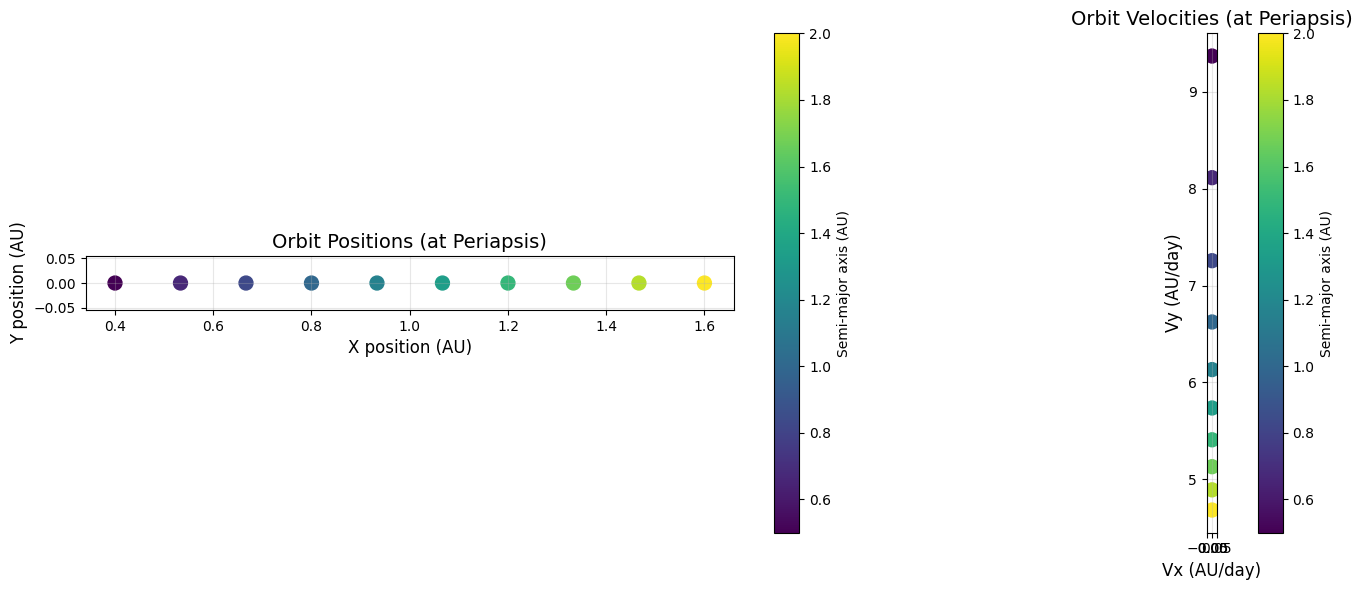

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot positions
x_positions = [r['x'] for r in results]
y_positions = [r['y'] for r in results]
a_values = [r['a_original'] for r in results]

scatter1 = ax1.scatter(x_positions, y_positions, c=a_values, cmap='viridis', s=100)
ax1.set_xlabel('X position (AU)', fontsize=12)
ax1.set_ylabel('Y position (AU)', fontsize=12)
ax1.set_title('Orbit Positions (at Periapsis)', fontsize=14)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Semi-major axis (AU)', fontsize=10)

# Plot velocities
vx_values = [r['vx'] for r in results]
vy_values = [r['vy'] for r in results]

scatter2 = ax2.scatter(vx_values, vy_values, c=a_values, cmap='viridis', s=100)
ax2.set_xlabel('Vx (AU/day)', fontsize=12)
ax2.set_ylabel('Vy (AU/day)', fontsize=12)
ax2.set_title('Orbit Velocities (at Periapsis)', fontsize=14)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Semi-major axis (AU)', fontsize=10)

plt.tight_layout()
plt.show()

## Summary

In this tutorial, we've demonstrated:

1. **Transformation from Cartesian to Orbital Elements**: Using `transformation_x_to_e()` to convert position and velocity vectors to orbital elements (q, e, i, Ω, ω, M, a).

2. **Transformation from Orbital Elements to Cartesian**: Using `transformation_e_to_x()` to perform the inverse transformation.

3. **Jacobian Matrix Computation**: Using `compute_jacobian_x_to_e()` to compute the Jacobian matrix, which is essential for transforming probability density functions between coordinate systems.

These transformations are fundamental for:
- Converting between different coordinate representations
- Computing probability densities in orbital element space from Cartesian space
- Analyzing asteroid populations and their distributions
- Performing statistical analysis of orbital parameters

The `OrbitalCoordinates` class provides a robust and efficient way to perform these transformations using SPICE routines, ensuring accuracy and reliability in orbital mechanics calculations.

---

**MultiNEAs** - Numerical tools for near-earth asteroid dynamics and population

© 2026 Jorge I. Zuluaga and Juanita A. Agudelo